In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import optuna

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,matthews_corrcoef, precision_recall_curve,roc_auc_score




In [2]:
with open("optim_param/optim_DNN_1_params.json", "r") as f:
    DNN_1_params = json.load(f)

with open("optim_param/optim_DNN_2_params.json", "r") as f:
    DNN_2_params = json.load(f)

with open("optim_param/optim_DNN_3_params.json", "r") as f:
    DNN_3_params = json.load(f)

with open("optim_param/optim_DNN_4_params.json", "r") as f:
    DNN_4_params = json.load(f)

with open("optim_param/optim_DNN_5_params.json", "r") as f:
    DNN_5_params = json.load(f)

with open("optim_param/optim_DNN_6_params.json", "r") as f:
    DNN_6_params = json.load(f)

with open("optim_param/optim_DNN_7_params.json", "r") as f:
    DNN_7_params = json.load(f)

with open("optim_param/optim_ResNet_params.json", "r") as f:
    ResNet_params = json.load(f)

with open("optim_param/optim_FTTansformer_params.json", "r") as f:
    FTTransformer_params = json.load(f)

In [3]:
class DNN_1(nn.Module):
    def __init__(self, input_dim, dropout_rate=DNN_1_params["dropout"]):
        super(DNN_1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.layer2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.layer3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.layer4 = nn.Linear(8, 4)
        self.bn4 = nn.BatchNorm1d(4)
        self.output_layer = nn.Linear(4, 1)

        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))  
        x = self.dropout(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn3(self.layer3(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn4(self.layer4(x))) 
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [4]:
class DNN_2(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_2_params["dropout1"],dropout2=DNN_2_params["dropout2"],dropout3=DNN_2_params["dropout3"],dropout4=DNN_2_params["dropout4"]):
        super(DNN_2, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16,8)
        self.layer4 = nn.Linear(8,4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)


        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [5]:
class DNN_3(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_3_params["dropout1"],dropout2=DNN_3_params["dropout2"]):
        super(DNN_3, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
    

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [6]:
class DNN_4(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_4_params["dropout1"],dropout2=DNN_4_params["dropout2"]):
        super(DNN_4, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [7]:
class DNN_5(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_5_params["dropout1"],dropout2=DNN_5_params["dropout2"]):
        super(DNN_5, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [8]:
class DNN_6(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_6_params["dropout1"],dropout2=DNN_6_params["dropout2"]):
        super(DNN_6, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [9]:
class DNN_7(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_7_params["dropout1"],dropout2=DNN_7_params["dropout2"]):
        super(DNN_7, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [10]:
class FTTransformer(nn.Module):
    def __init__(self, input_dim, num_classes=1, embed_dim=FTTransformer_params["embed_dim"], num_heads=FTTransformer_params["num_heads"], num_layers=FTTransformer_params["num_layers"], dropout=FTTransformer_params["dropout"]):
        super(FTTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.embedding_dropout = nn.Dropout(dropout)  # 埋め込み層後のDropout
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)
        self.output_dropout = nn.Dropout(dropout)  # 出力層前のDropout

    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)  # Dropoutを埋め込み層後に適用
        x = x.unsqueeze(1)  # [batch_size, 1, embed_dim]
        x = self.transformer(x)
        x = x.mean(dim=1)  # 平均プーリング
        x = self.output_dropout(x)  # Dropoutを適用
        x = self.fc(x)
        x = torch.sigmoid(x)  # 2値分類用のシグモイド活性化
        return x


In [11]:
class ResidualBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim,dropout1,dropout2):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.dropout1=nn.Dropout(dropout1)
        
        self.fc2 = nn.Linear(hidden_dim, input_dim)
        self.bn2 = nn.BatchNorm1d(input_dim)
        self.dropout2=nn.Dropout(dropout2)

    def forward(self, x):
        residual = x  # 入力を保存 (ショートカット)
        out = torch.relu(self.bn1(self.fc1(x)))
        out=self.dropout1(out)

        out = self.bn2(self.fc2(out))
        out=self.dropout2(out)

        out += residual  # ショートカット接続
        return torch.relu(out)


In [12]:
class ResNetBinaryClassifier(nn.Module):
    def __init__(self, input_dim, num_blocks=ResNet_params["num_blocks"], hidden_dim=ResNet_params["hidden_dim"], dropout1=ResNet_params["dropout1"], dropout2=ResNet_params["dropout2"]):
        super(ResNetBinaryClassifier, self).__init__()
        self.blocks = nn.Sequential(
            *[ResidualBlock(input_dim, hidden_dim, dropout1, dropout2) for _ in range(num_blocks)]
        )
        self.output_layer = nn.Linear(input_dim, 1)  # 出力層

    def forward(self, x):
        x = self.blocks(x)
        x = torch.sigmoid(self.output_layer(x))  # 2値分類用シグモイド
        return x

In [13]:
df=pd.read_csv('learning_data.csv',index_col=0)

X=df.drop(columns='dengue',axis=1).values
y=df['dengue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_test_tensor=torch.tensor(X_test, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test, dtype=torch.float32)

In [14]:
# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_paths = [
    "model_params/DNN_1.pth",
    "model_params/DNN_2.pth",
    "model_params/DNN_3.pth",
    "model_params/DNN_4.pth",
    "model_params/DNN_5.pth",
    "model_params/DNN_6.pth",
    "model_params/DNN_7.pth",
    "model_params/FTTransformer.pth",
    "model_params/ResNet.pth",
    ]

model_classes = {0: DNN_1,
                 1: DNN_2,
                 2: DNN_3,
                 3: DNN_4,
                 4: DNN_5,
                 5: DNN_6,
                 6: DNN_7,
                 7:FTTransformer,
                 8:ResNetBinaryClassifier
                 }

models=[]

for i, path in enumerate(model_paths):
    if i in model_classes:
        model = model_classes[i](input_dim=X_train.shape[1]).to(device)
        model.load_state_dict(torch.load(path, map_location=device))
        model.eval()
        models.append(model)

/tmp/ipykernel_42156/1801429464.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))
/home/gonken/anaconda3/envs

In [15]:
train_outputs = []
test_outputs = []

with torch.no_grad():
    for model in models:
        model.eval()
        
        train_output = model(X_train_tensor.to(device))
        train_outputs.append(train_output)
        
        # テストデータの出力
        test_output = model(X_test_tensor.to(device))
        test_outputs.append(test_output)

train_DL_features = torch.cat(train_outputs, dim=1)  
test_DL_features = torch.cat(test_outputs, dim=1) 

# 出力形状の確認
print(f"Train DL Features Shape: {train_DL_features.shape}")
print(f"Test DL Features Shape: {test_DL_features.shape}")


Train DL Features Shape: torch.Size([3508, 9])
Test DL Features Shape: torch.Size([878, 9])


In [16]:
train_DL_features_np = train_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(train_DL_features_np.reshape(-1, train_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=6,random_state=0)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=3, random_state=0)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"train_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
train_standardized_features = scaler_standard.fit_transform(all_features)

print(f"train_standardized_features.shape: {train_standardized_features.shape}")

all_features.shape: (3508, 20)
train_DL_features_np.shape: (3508, 9)
train_standardized_features.shape: (3508, 20)


In [17]:
test_DL_features_np = test_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(test_DL_features_np.reshape(-1, test_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=6,random_state=0)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=3, random_state=0)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"test_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
test_standardized_features = scaler_standard.fit_transform(all_features)

print(f"test_standardized_features.shape: {test_standardized_features.shape}")

all_features.shape: (878, 20)
test_DL_features_np.shape: (3508, 9)
test_standardized_features.shape: (878, 20)


In [18]:
X_train,X_test,y_train,y_test=train_standardized_features,test_standardized_features,y_train,y_test

In [19]:
meta_model = RandomForestClassifier(n_estimators=170)
meta_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=170)

In [20]:
# 予測
predictions = meta_model.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
mcc = matthews_corrcoef(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# 結果の表示
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"MCC: {mcc:.4f}")

Accuracy: 61.96%
F1 Score: 0.4955
Precision: 0.4896
Recall: 0.5015
MCC: 0.1903


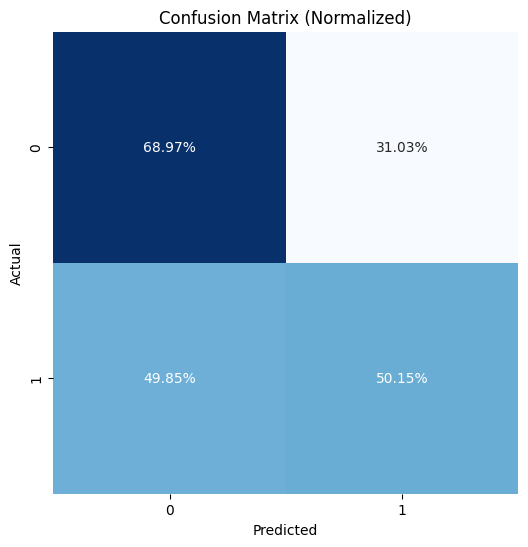

In [21]:
cm = confusion_matrix(y_test, predictions, normalize='true')  # 行方向に正規化
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False)  # パーセンテージ形式で表示
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Normalized)")
plt.show()